In [1]:
import torchlensmaker as tlm
import torch

import json

from torchlensmaker.new_light_sources.light_sources_elements import GenericLightSource, Object2D, ObjectAtInfinity2D, PointSource2D, RaySource2D, Object3D
from torchlensmaker.new_light_sources.source_geometry_elements import ObjectGeometry2D

from torchlensmaker.new_sampling.sampler_elements import LinspaceSampler1D
from torchlensmaker.new_material.material_elements import NonDispersiveMaterial


def describe(name, t):
    print(name)
    print(t.shape)
    print(t.min(), t.max())
    print()

optics = tlm.Sequential(
    tlm.SubChain(
        #tlm.Rotate2D(15),
        #Object2D(beam_angular_size=5, object_diameter=5, wavelength=(600, 800)),
    #  ObjectAtInfinity2D(beam_diameter=5, angular_size=10)
    #PointSource2D(beam_angular_size=30),
        #RaySource2D(),
        Object3D(beam_angular_size=5, object_diameter=5, wavelength=(400, 800)),
    ),
    tlm.Gap(10),
    tlm.RefractiveSurface(tlm.Sphere(15, 50), material="BK7"),
    tlm.Gap(50),
    tlm.Aperture(50)
)

print(optics)

data = tlm.default_input(dim=3, dtype=torch.float64, sampling={"base": 5, "object": 3, "wavelength": 3})
outputs = optics(data)

scene = tlm.show3d(optics, sampling={"base": 6, "object": 10, "wavelength": 5}, return_scene=True)
# json.dump(scene, open("testnb.json", "w"))


Sequential(
  (0): SubChain(
    (_sequential): Sequential(
      (0): Object3D(
        (sampler_pupil): DiskSampler2D()
        (sampler_field): DiskSampler2D()
        (sampler_wavelength): LinspaceSampler1D()
        (material): NonDispersiveMaterial()
        (geometry): ObjectGeometry3D()
      )
    )
  )
  (1): Gap(
    (mixed_dim): MixedDim(
      (module_2d): Translate2D()
      (module_3d): Translate3D()
    )
  )
  (2): RefractiveSurface(
    (collision_surface): CollisionSurface()
  )
  (3): Gap(
    (mixed_dim): MixedDim(
      (module_2d): Translate2D()
      (module_3d): Translate3D()
    )
  )
  (4): Aperture(
    (collision_surface): CollisionSurface()
  )
)


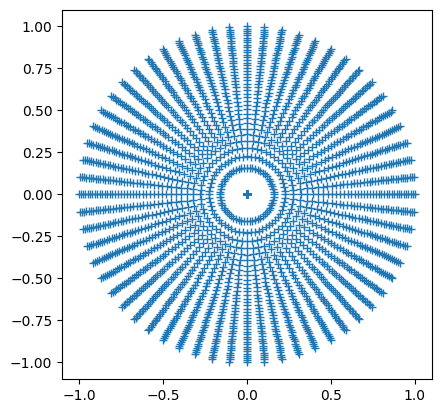

In [6]:
from torchlensmaker.new_sampling.sampling import disk_sampling

import matplotlib.pyplot as plt

samples = disk_sampling(torch.tensor(40), torch.tensor(60), torch.float64, torch.device("cpu"))

plt.plot(samples[:, 0], samples[:, 1], linestyle="none", marker="+")
plt.gca().set_aspect("equal")

In [3]:
torch.linspace(0, 1, 10)

tensor([0.0000, 0.1111, 0.2222, 0.3333, 0.4444, 0.5556, 0.6667, 0.7778, 0.8889,
        1.0000])

In [4]:
torch.arange(0, 10) / 10

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000])